1 Etude du problème d’optimisation


Alpha = 0.01
q* = [421.30715693 128.09177856 127.36254945]
r* = [  1858.12115584 118758.19525429   1406.82187687   6397.29663707
   1088.78011779]
Profit = 363.6857801911934

Alpha = 0.1
q* = [402.10259659  72.93180628  42.20997002]
r* = [  1595.43267064 107415.44290009    710.08436028   3339.37195132
    630.69481819]
Profit = 333.5089317392619

Alpha = 1.0
q* = [400.21265802  67.61066022  33.94292798]
r* = [  1569.90855148 106310.5905216     642.71406568   3043.85568851
    574.69061185]
Profit = 330.50515778716124

Alpha = 2.0
q* = [364.10588479  66.94046912  76.73204647]
r* = [ 1484.98358146 98300.0098881    765.72145123  3444.98829023
   568.99398749]
Profit = 306.254090972365


C:\Users\adria\AppData\Local\Temp\ipykernel_9684\1083028969.py:22: RuntimeWarning: invalid value encountered in divide
  return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))



Alpha = 4.0
q* = [183.929937    67.62559584  30.94686722]
r* = [  809.95283839 52176.80297328   634.62432163  3015.55516271
   574.95558129]
Profit = 210.2125921307644

Alpha = 6.0
q* = [121.41385211  66.93042724  35.75307698]
r* = [  594.56241387 36601.7241329  40829.49722622  3034.74785962
   568.90863158]
Profit = 125.7847090877428

Alpha = 8.0
q* = [92.71240591 95.53531799 33.02048457]
r* = [  548.58573958 31646.43903047   863.35483261  4151.64675754
   812.05044664]
Profit = 153.62533543936786

Alpha = 10.0
q* = [72.71773122 67.05266193 33.09285436]
r* = [  421.71023748 24370.96711782   635.69985848  3013.03502059
   569.94762636]
Profit = 151.83344489516662


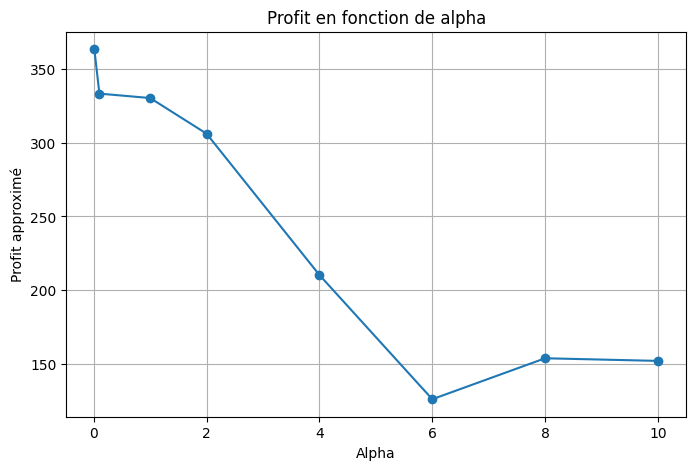

In [3]:
# Mini-projet : Au blé d'or - Partie 2 : Résolution numérique approchée

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Paramètres du problème
c = 1e-3 * np.array([30, 1, 1.3, 4, 1])
v = np.array([0.9, 1.5, 1.1])
d = np.array([400, 67, 33])

A = np.array([
    [3.5, 2, 1],
    [250, 80, 25],
    [0, 8, 3],
    [0, 40, 10],
    [0, 8.5, 0]
])

# Fonction h approchant min composante par composante
def h(q, d, alpha):
    return (q * np.exp(-alpha * q) + d * np.exp(-alpha * d)) / (np.exp(-alpha * q) + np.exp(-alpha * d))

# Fonction objectif (négative car on minimise)
def objective_factory(alpha):
    def objective(z):
        q = z[:3]
        r = z[3:]
        h_val = h(q, d, alpha)
        return - (v @ h_val - c @ r)
    return objective

# Contrainte : r >= A q
def constraint_ineq(z):
    q = z[:3]
    r = z[3:]
    return r - A @ q

# Bornes des variables (toutes ≥ 0)
bounds = [(0, None)] * 8
constraints = [{'type': 'ineq', 'fun': constraint_ineq}]

# Point de départ
z0 = np.array([10, 10, 10] + [1000] * 5)

# Test pour différentes valeurs de alpha
alphas = [0.01, 0.1, 1.0,2.0,4.0,6.0,8.0, 10.0]
profits = []
solutions_q = []

for alpha in alphas:
    result = minimize(
        objective_factory(alpha),
        z0,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    q_opt = result.x[:3]
    r_opt = result.x[3:]
    profit = -result.fun
    profits.append(profit)
    solutions_q.append(q_opt)
    print(f"\nAlpha = {alpha}")
    print("q* =", q_opt)
    print("r* =", r_opt)
    print("Profit =", profit)

# Affichage graphique
plt.figure(figsize=(8,5))
plt.plot(alphas, profits, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Profit approximé")
plt.title("Profit en fonction de alpha")
plt.grid(True)
plt.show()

## Partie 2 - Étude et résolution numérique

5. Pour résoudre ce problème on peut envisager une résolution numérique à l'aide du module scipy.optimize, à la lumère de ce qu'on a fait pour le TP3. En effet, puisqu'il s'agit d'un problème d'optimisation avec contraintes et que la fonction à minimiser est différentiable, cette méthode de resolution est adaptée

7a) On cherche à maximiser le profit attendu:
$$ \max_{q\in \mathbb{R}_{+}^{p},\space  r\in \mathbb{R}_{+}^{m},\space Aq\leqslant r }\sum_{k=1}^{K}\pi_{k}(v^{T}h(q, d_{k})-c^{T}r))$$ 

$$ = \max_{q\in \mathbb{R}_{+}^{p},\space  r\in \mathbb{R}_{+}^{m},\space Aq\leqslant r }\sum_{k=1}^{K}\pi_{k}v^{T}h(q, d_{k})-c^{T}r $$ 

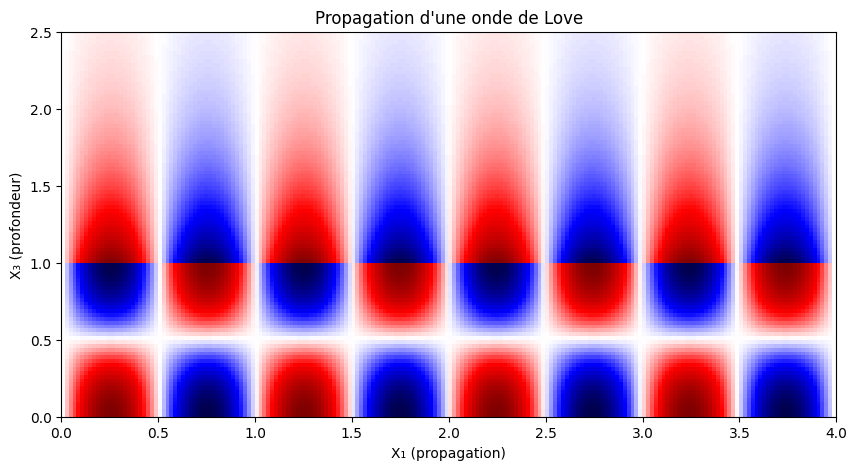

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Paramètres physiques
H = 1.0              # Profondeur de la couche (en unités arbitraires)
couche_points = 100  # Nombre de points en profondeur
X1_points = 200      # Points en X1 (direction de propagation)
X3_max = 2.5         # Profondeur totale affichée

k = 2 * np.pi / 1.0   # Nombre d'onde
c = 1.0               # Vitesse de phase
omega = c * k         # Pulsation

# Grilles d’espace
x1 = np.linspace(0, 4, X1_points)
x3 = np.linspace(0, X3_max, couche_points)
X1, X3 = np.meshgrid(x1, x3)

# Amplitude dans la couche (sinusoïdale)
def f_couche(X3):
    return np.cos(np.pi * X3 / H)

# Amplitude dans le massif (évanescente)
def f_massif(X3):
    return np.exp(-2 * (X3 - H))

# Fonction de déplacement
def u2(X1, X3, t):
    U = np.zeros_like(X1)
    for i in range(X3.shape[0]):
        for j in range(X3.shape[1]):
            if X3[i, j] <= H:
                amp = f_couche(X3[i, j])
            else:
                amp = f_massif(X3[i, j])
            U[i, j] = amp * np.sin(k * X1[i, j] - omega * t)
    return U

# Animation
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(u2(X1, X3, 0), cmap='seismic', origin='lower',
               extent=[x1.min(), x1.max(), 0, X3_max],
               aspect='auto', vmin=-1, vmax=1)
ax.set_xlabel("X₁ (propagation)")
ax.set_ylabel("X₃ (profondeur)")
ax.set_title("Propagation d'une onde de Love")

def update(frame):
    im.set_array(u2(X1, X3, frame * 0.05))
    return [im]

ani = animation.FuncAnimation(fig, update, frames=200, interval=30, blit=True)
plt.show()